In [2]:
import cv2
import numpy as np



In [102]:
# Open the image files.
img2_color = cv2.imread("./img_test_3/second_img.jpg") # Image to be aligned.
img1_color = cv2.imread("./img_test_3/warped.jpg") # Reference image.


In [103]:

# Convert to grayscale.
img1 = cv2.cvtColor(img1_color, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2_color, cv2.COLOR_BGR2GRAY)
height, width = img2.shape

# Create ORB detector with 5000 features.
orb_detector = cv2.ORB_create(5000)

# Find keypoints and descriptors.
# The first arg is the image, second arg is the mask
# (which is not required in this case).
kp1, d1 = orb_detector.detectAndCompute(img1, None)
kp2, d2 = orb_detector.detectAndCompute(img2, None)

# Match features between the two images.
# We create a Brute Force matcher with
# Hamming distance as measurement mode.
matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)

# Match the two sets of descriptors.

matches = matcher.match(d1, d2)
#print(f"matches = {matches}")
# Sort matches on the basis of their Hamming distance.
matchse = list(matches).sort(key = lambda x: x.distance)

# Take the top 90 % matches forward.
matches = matches[:int(len(matches)*0.9)]
no_of_matches = len(matches)

# Define empty matrices of shape no_of_matches * 2.
p1 = np.zeros((no_of_matches, 2))
p2 = np.zeros((no_of_matches, 2))

for i in range(len(matches)):
    p1[i, :] = kp1[matches[i].queryIdx].pt
    p2[i, :] = kp2[matches[i].trainIdx].pt

# Find the homography matrix.
homography, mask = cv2.findHomography(p1, p2, cv2.RANSAC)

# Use this matrix to transform the
# colored image wrt the reference image.
transformed_img = cv2.warpPerspective(img2_color,
					homography, (width, height))

# Save the output.
cv2.imwrite('output.jpg', transformed_img)


True

In [89]:
def order_points(pts):
    # initialzie a list of coordinates that will be ordered
    # such that the first entry in the list is the top-left,
    # the second entry is the top-right, the third is the
    # bottom-right, and the fourth is the bottom-left
    rect = np.zeros((4, 2), dtype = "float32")
    # the top-left point will have the smallest sum, whereas
    # the bottom-right point will have the largest sum
    s = pts.sum(axis = 1)
    rect[0] = pts[np.argmin(s)]
    rect[2] = pts[np.argmax(s)]
    # now, compute the difference between the points, the
    # top-right point will have the smallest difference,
    # whereas the bottom-left will have the largest difference
    diff = np.diff(pts, axis = 1)
    rect[1] = pts[np.argmin(diff)]
    rect[3] = pts[np.argmax(diff)]
    # return the ordered coordinates
    return rect

def four_point_transform(image, pts):
    print("in_for_points")
    rect = order_points(pts)
    (tl, tr, br, bl) = rect
    print(f" tl = {tl}, tr = {tr}, br = {br}, bl = {bl} ")
    widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
    print(f"widthA = {widthA}")
    widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
    print(f"widthB = {widthB}")
    maxWidth = max(int(widthA), int(widthB))
    print(f"maxWidth = {maxWidth}")
    heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
    heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
    maxHeight = max(int(heightA), int(heightB))

    dst = np.array([
        [0, 0],
        [maxWidth - 1, 0],
        [maxWidth - 1, maxHeight - 1],
        [0, maxHeight - 1]], dtype = "float32")

    M = cv2.getPerspectiveTransform(rect, dst)
    warped = cv2.warpPerspective(image, M, (maxWidth, maxHeight))

    return warped

import cv2 as cv
import numpy as np

def unsharp_mask(image, kernel_size=(5, 5), sigma=1.0, amount=1.5, threshold=2):
    """Return a sharpened version of the image, using an unsharp mask."""
    blurred = cv.GaussianBlur(image, kernel_size, sigma)
    sharpened = float(amount + 1) * image - float(amount) * blurred
    sharpened = np.maximum(sharpened, np.zeros(sharpened.shape))
    sharpened = np.minimum(sharpened, 255 * np.ones(sharpened.shape))
    sharpened = sharpened.round().astype(np.uint8)
    if threshold > 0:
        low_contrast_mask = np.absolute(image - blurred) < threshold
        np.copyto(sharpened, image, where=low_contrast_mask)
    return sharpened

def example():
    image = cv.imread('my-image.jpg')
    sharpened_image = unsharp_mask(image)
    cv.imwrite('my-sharpened-image.jpg', sharpened_image)

['14_sept_2021.JPG', '25_sept_2021.JPG']
14_sept_2021.JPG
(2250, 4000, 3)
25_sept_2021.JPG
(2250, 4000, 3)
(2, 2250, 4000, 3)
h = 2250, w = 4000
(2250, 4000, 3)
(4, 2)
in_for_points
 tl = [  0.      122.74442], tr = [3514.5723  372.2424], br = [3449.7554 2250.    ], bl = [   0.     2141.2014] 
widthA = 3451.4705926991733
widthB = 3523.417014098471
maxWidth = 3523
done


C:\Users\ionut.girla\Anaconda3\envs\articol\lib\site-packages\matplotlib\_api\__init__.py:125: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if val not in values:


ValueError: array([[[254,   0,   0],
        [252,   1,   1],
        [253,   0,   0],
        ...,
        [ 19,  37,  34],
        [ 16,  33,  30],
        [ 14,  31,  28]],

       [[255,   0,   0],
        [254,   0,   0],
        [255,   0,   0],
        ...,
        [ 17,  35,  32],
        [ 14,  31,  28],
        [ 16,  32,  29]],

       [[234,   5,   5],
        [251,   1,   1],
        [254,   0,   0],
        ...,
        [ 20,  37,  34],
        [ 14,  30,  27],
        [ 16,  31,  29]],

       ...,

       [[171, 180, 207],
        [169, 178, 205],
        [168, 176, 205],
        ...,
        [ 20,  28,  20],
        [ 18,  26,  19],
        [ 19,  27,  20]],

       [[175, 182, 211],
        [170, 178, 207],
        [169, 177, 206],
        ...,
        [ 18,  26,  18],
        [ 19,  27,  19],
        [ 20,  28,  21]],

       [[173, 181, 210],
        [170, 178, 207],
        [169, 177, 206],
        ...,
        [ 16,  25,  15],
        [ 17,  25,  17],
        [ 19,  27,  20]]], dtype=uint8) is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

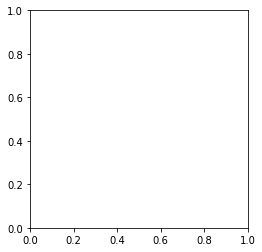

In [106]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
MIN_MATCH_COUNT = 10

from imutils import paths
import numpy as np
import argparse
import imutils
import cv2
import os

imagePaths = os.listdir('./img_test_2')
print(imagePaths)
# loop over the image paths, load each one, and add them to our
# images to stich list
images = []
for imagePath in imagePaths :
	print(imagePath)
	if 'JPG' in imagePath:
		image = cv2.imread(str('./img_test_2/' + str(imagePath)))
		print(np.shape(image))
		images.append(image)
print(np.shape(images))
img1 = images[1]         # queryImage
img2 = images[0] # trainImage
#print(img1)
# Initiate SIFT detector
sift = cv.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)
flann = cv.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1,des2,k=2)
# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)

if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
    M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()
    h,w,_ = np.shape(img1)
    print(f"h = {h}, w = {w}")
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv.perspectiveTransform(pts,M)
    img2 = cv.polylines(img2,[np.int32(dst)],True,255,3, cv.LINE_AA)
else:
    print( "Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT) )
    matchesMask = None

draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)
img3 = cv.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)

cv2.imwrite('./result/matches.jpg', img3)

#print(dst)
print(np.shape(img1))
for i in range (len(dst)):
    for j in range (len(dst[i])):
            dst[i][j][0] = min(np.shape(img1)[1],dst[i][j][0])
            dst[i][j][0] = max(0,dst[i][j][0])
            dst[i][j][1] = min(np.shape(img1)[0],dst[i][j][1])
            dst[i][j][1] = max(0,dst[i][j][1])
#dst = list(np.array(dst.max(0,dst)))
dst = dst.reshape(4,2)


print(np.shape(dst))
warped = four_point_transform(images[0], dst)
# show the original and warped images
cv2.imwrite('./result/first_img.jpg', images[0])
cv2.imwrite('./result/warped.jpg', warped)
cv2.imwrite('./result/second_img.jpg', images[1])

kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
filtered = cv2.filter2D(warped, -1, kernel)

cv2.imwrite('./result/filtered.jpg', filtered)

sharpened_image = unsharp_mask(warped)

cv2.imwrite('./result/sharpened_image.jpg', sharpened_image)
print("done")

img = images[0]
warped = imutils.resize(warped, width=3000)
img = imutils.resize(img, width=3000)
warped = imutils.resize(warped, height=2000)
img = imutils.resize(img, height=2000)
# our first output visualization of the image alignment will be a
# side-by-side comparison of the output aligned image and the
# template
stacked = np.hstack([warped, img])

overlay = warped.copy()
output = img.copy()
#cv2.addWeighted(overlay, 0.5, output, 0.5, 0, output)
# show the two output image alignment visualizations
plt.imshow(stacked)
plt.imshow(output)


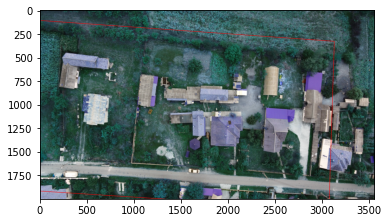

In [107]:
plt.imshow(stacked)
plt.sh
plt.imshow(output)

In [84]:
warped = []

In [97]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
MIN_MATCH_COUNT = 10

from imutils import paths
import numpy as np
import argparse
import imutils
import cv2
import os

imagePaths = os.listdir('./img_test_3')
print(imagePaths)
# loop over the image paths, load each one, and add them to our
# images to stich list
images = []
for imagePath in imagePaths :
	print(imagePath)
	if 'jpg' in imagePath:
		image = cv2.imread(str('./img_test_3/' + str(imagePath)))
		print(np.shape(image))
		images.append(image)
print(np.shape(images))
img1 = images[0]         # queryImage
img2 = images[1] # trainImage
#print(img1)
# Initiate SIFT detector

sift = cv.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)
flann = cv.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1,des2,k=2)
# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)

        
if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
    M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()
    h,w,_ = np.shape(img1)
    print(f"h = {h}, w = {w}")
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv.perspectiveTransform(pts,M)
    img2 = cv.polylines(img2,[np.int32(dst)],True,255,3, cv.LINE_AA)
else:
    print( "Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT) )
    matchesMask = None

draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)
img3 = cv.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)

cv2.imwrite('./result_second_step/matches.jpg', img3)

#print(dst)
print(np.shape(img1))
for i in range (len(dst)):
    for j in range (len(dst[i])):
            dst[i][j][0] = min(np.shape(img1)[1],dst[i][j][0])
            dst[i][j][0] = max(0,dst[i][j][0])
            dst[i][j][1] = min(np.shape(img1)[0],dst[i][j][1])
            dst[i][j][1] = max(0,dst[i][j][1])
#dst = list(np.array(dst.max(0,dst)))
dst = dst.reshape(4,2)
for point in dst:
    print(f" point is {point}")
print(f"images[0] = {np.shape(images[0])}")
print(f"images[1] = {np.shape(images[1])}")
print(f"np.shape(dst)= {np.shape(dst)}")

#

print("in_for_points")
rect = order_points(dst)
(tl, tr, br, bl) = rect
print(f" tl = {tl}, tr = {tr}, br = {br}, bl = {bl} ")
widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
print(f"widthA = {widthA}")
widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
print(f"widthB = {widthB}")
maxWidth = max(int(widthA), int(widthB))
print(f"maxWidth = {maxWidth}")
heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
maxHeight = max(int(heightA), int(heightB))

dst = np.array([
    [0, 0],
    [maxWidth - 1, 0],
    [maxWidth - 1, maxHeight - 1],
    [0, maxHeight - 1]], dtype = "float32")

cropped_img = images[0][int(tl[0]):int(tr[0])][int(tl[1]):int(bl[1])]

cv2.imwrite('./result_second_step/cropped_img.jpg', cropped_img)

M = cv2.getPerspectiveTransform(rect, dst)
warped_with_crop = cv2.warpPerspective(cropped_img, M, (maxWidth, maxHeight))
cv2.imwrite('./result_second_step/warped_with_crop.jpg', warped_with_crop)

warped = four_point_transform(images[1], dst)
print(f"warped = {np.shape(warped)}")
# show the original and warped images
cv2.imwrite('./result_second_step/first_img.jpg', images[0])
cv2.imwrite('./result_second_step/warped.jpg', warped)
cv2.imwrite('./result_second_step/second_img.jpg', images[1])

kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
filtered = cv2.filter2D(warped, -1, kernel)

cv2.imwrite('./result_second_step/filtered.jpg', filtered)

sharpened_image = unsharp_mask(warped)

cv2.imwrite('./result_second_step/sharpened_image.jpg', sharpened_image)
print("done")

['second_img.jpg', 'warped.jpg']
second_img.jpg
(2250, 4000, 3)
warped.jpg
(2026, 3527, 3)
(2,)
h = 2250, w = 4000
(2250, 4000, 3)
 point is [0. 0.]
 point is [   0.    2029.827]
 point is [3527.4985 2160.156 ]
 point is [3529.7195    0.    ]
images[0] = (2250, 4000, 3)
images[1] = (2026, 3527, 3)
np.shape(dst)= (4, 2)
in_for_points
 tl = [0. 0.], tr = [3529.7195    0.    ], br = [3527.4985 2160.156 ], bl = [   0.    2029.827] 
widthA = 3529.9053186204533
widthB = 3529.719482421875
maxWidth = 3529
in_for_points
 tl = [0. 0.], tr = [3528.    0.], br = [3528. 2159.], bl = [   0. 2159.] 
widthA = 3528.0
widthB = 3528.0
maxWidth = 3528
warped = (2159, 3528, 3)
done
